<a href="https://colab.research.google.com/github/sanjanaamara99/naanmudhalvan/blob/main/Use_case_9_Advanced_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing


In [1]:
# lets import everything here
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('ggplot')



In [2]:
### lets import the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(f"Training images shape:{x_train.shape}")
print(f"Training labels shape:{y_train.shape}")
print(f"Test images shape:{x_test.shape}")
print(f"Test labels shape:{y_test.shape}")

Training images shape:(50000, 32, 32, 3)
Training labels shape:(50000, 1)
Test images shape:(10000, 32, 32, 3)
Test labels shape:(10000, 1)


In [4]:
NUM_CLASSES=10

CLASSES=[
          'airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck'

         ]

In [5]:
plt.style.use('dark_background')

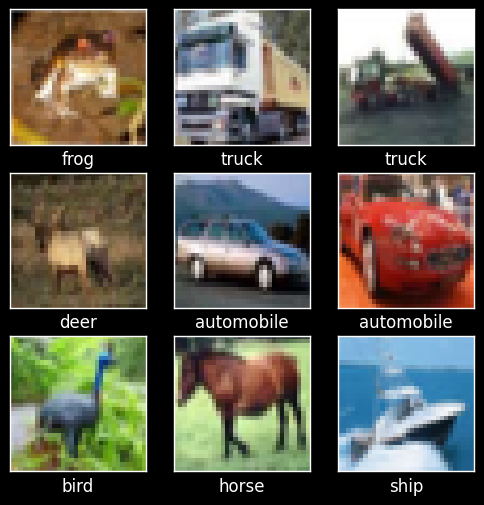

In [6]:
# Visualize the dataset
plt.figure(figsize=(6,6))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(CLASSES[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

plt.show();

In [7]:
## normalize the images
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255



In [8]:
##check the images
x_train[0].dtype,x_train[0].max(),x_train[0].min()

(dtype('float32'), 1.0, 0.0)

In [9]:
# currently how y_train looks
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)


In [11]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()

In [13]:
# add our first conv layer
model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    padding='same',
    activation='relu',
    input_shape=(32,32,3)
))

In [14]:
model.add(
    MaxPool2D(
        pool_size=(2,2),
        padding='same',
        )
)

In [15]:
## add our second layer
model.add (Conv2D(32,(3,3),activation='relu',padding='same'))
## another pooling layer
model.add(MaxPool2D(2,2))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
## add third conv layer
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
Total params: 28640 (111.88 KB)
Trainable params: 28640 

In [19]:
## Flatten the output
model.add(Flatten())

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [21]:
## quick tip
model.layers

In [22]:
model.layers[-1].output.shape

TensorShape([None, 4096])

In [23]:
## now lets add dense layers
model.add(Dense(256,activation='relu'))

## output layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [25]:
optimizer=Adam(learning_rate=0.01)

In [26]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Training the model


In [27]:
NUM_EPOCHS=50
BATCH_SIZE=128

In [28]:
history = model.fit(
    x_train,
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Epoch 1/50
391/391 [==============================] - 8s 8ms/step - loss: 1.8415 - accuracy: 0.3328 - val_loss: 1.5561 - val_accuracy: 0.4339
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 1.5215 - accuracy: 0.4475 - val_loss: 1.4483 - val_accuracy: 0.4725
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3994 - accuracy: 0.4941 - val_loss: 1.3645 - val_accuracy: 0.5057
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3505 - accuracy: 0.5157 - val_loss: 1.4026 - val_accuracy: 0.4926
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2888 - accuracy: 0.5414 - val_loss: 1.3139 - val_accuracy: 0.5354
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2472 - accuracy: 0.5566 - val_loss: 1.3255 - val_accuracy: 0.5258
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 1.2229 - accuracy: 0.5644 - val_loss: 1.2998 - val_accuracy: 0.5385
Epoch 

In [29]:
## function to plot loss and accuracy

def plot_history(history):
  fig=plt.figure(figsize=(10,4))
  ## accuracy plot
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of model')
  plt.xlabel('Epoches')
  plt.ylabel('Accuracy')
  plt.grid(False)
  plt.legend(['train','test'],loc='lower right')

  ## loss plot
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('loss of model')
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.grid(False)
  plt.legend(['train','test'],loc='upper right')

  plt.tight_layout()

  fig.show();


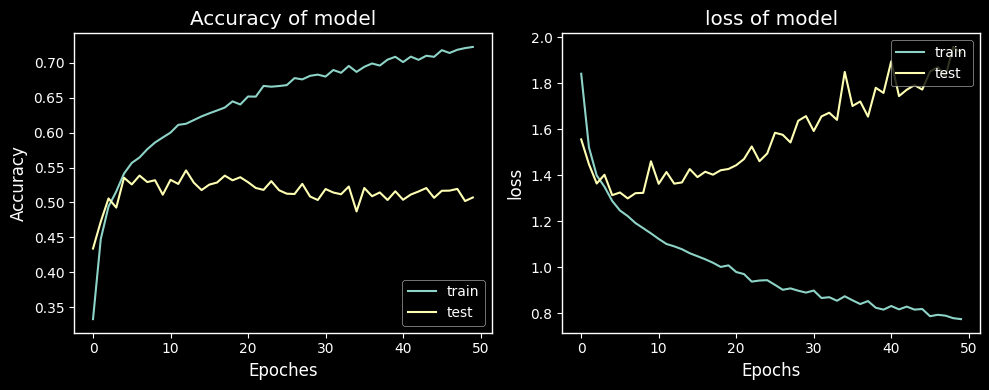

In [30]:
plot_history(history)

In [31]:
model2=Sequential()

In [32]:
## first layers
model2.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model2.add(MaxPool2D((2,2)))

In [33]:
## second layers
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D((2,2)))

## add dropout also
model2.add(Dropout(0.3))## 30% dropout rate


In [34]:
## third layers
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D((2,2)))

## add dropout also
model2.add(Dropout(0.3))## 30% dropout rate

In [35]:
## flatten layer
model2.add(Flatten())
## dense layer one
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.3))

##output layer
model2.add(Dense(NUM_CLASSES,activation='softmax'))

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)         

lets add a simple learning rate schedule


In [37]:
from tensorflow.keras.callbacks import LearningRateScheduler


In [38]:
## learning rate schedule callbacks
def simple_decay(epoch,lr):

  if epoch<30:
    lrate=lr
  elif epoch<60:
      lrate=0.0005
  else:
        lrate=0.0001
  return lrate

In [39]:
## create scheduler
scheduler=LearningRateScheduler(simple_decay)


In [40]:
callbacks=[scheduler]

In [41]:
optimizer = Adam(learning_rate=0.001)

In [42]:
model2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
history2 = model2.fit(
    x_train,
    y_train,
    epochs=100,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

Epoch 1/100
1563/1563 [==============================] - 13s 6ms/step - loss: 1.5904 - accuracy: 0.4154 - val_loss: 1.2633 - val_accuracy: 0.5409 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2419 - accuracy: 0.5546 - val_loss: 1.0646 - val_accuracy: 0.6264 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0989 - accuracy: 0.6065 - val_loss: 0.9692 - val_accuracy: 0.6631 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0060 - accuracy: 0.6454 - val_loss: 0.8853 - val_accuracy: 0.6885 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9450 - accuracy: 0.6647 - val_loss: 0.8633 - val_accuracy: 0.7041 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8968 - accuracy: 0.6837 - val_loss: 0.8269 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 7/100
1563/1563 [============================

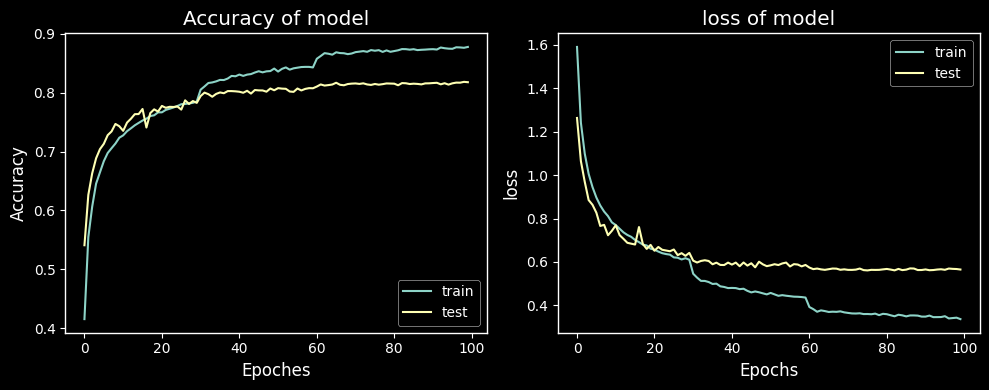

In [44]:
plot_history(history2)